# Fashion-MNIST classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = [
    'top', 'trousers', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


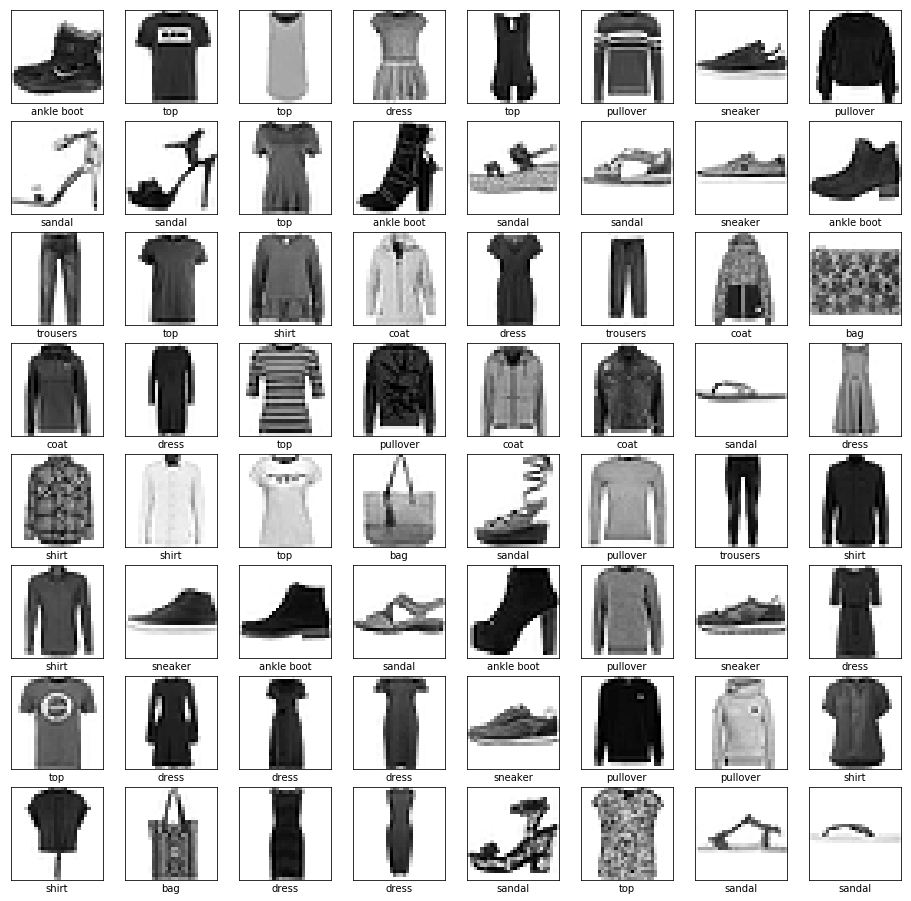

In [6]:
plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

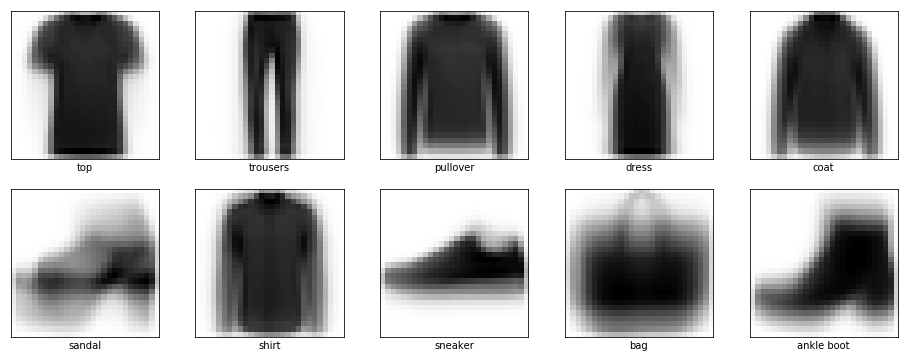

In [7]:
centroids = [(labels[i], np.mean(train_x[train_y == i], axis=0)) for i in np.unique(train_y)]

plt.figure(figsize=(16, 6))
for i, (label, image) in enumerate(centroids):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
train_x = train_x / 255
val_x = val_x / 255
test_x = test_x / 255

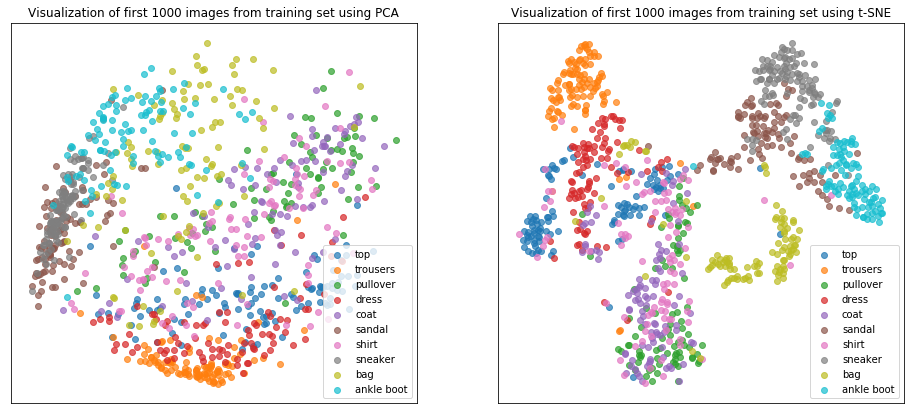

In [9]:
points_n = 1000
plt.figure(figsize=(16, 7))
for i, (alg_name, alg) in enumerate([
        ('PCA', PCA(n_components=2)), ('t-SNE', TSNE(n_components=2))]):
    x = alg.fit_transform(train_x[:points_n].reshape(-1, 784))
    y = train_y[:points_n]
    data = [(labels[i], x[y == i]) for i in np.unique(y)]
    
    plt.subplot(1, 2, i + 1)
    for label, points in data:
        plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=label)
    plt.title(f'Visualization of first {points_n} images from training set using {alg_name}')
    plt.legend()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
def plot_history(history):
    plt.figure(figsize=(16, 5))
    for i, (name, key) in enumerate([('accuracy', 'acc'), ('loss', 'loss')]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.epoch, history.history[key], label=f'training {name}')
        plt.plot(history.epoch, history.history[f'val_{key}'], label=f'validation {name}')
        plt.title(f'Visualization of {name} during training')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel(name)
    plt.show()
    
    
def plot_confusion_matrix(cm, labels=labels):
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.binary)
    threshold = np.max(cm) / 2
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(
                j, i, cm[i, j], color='white' if cm[i, j] > threshold else 'black',
                horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.ylabel('true label')
    plt.yticks(range(len(labels)), labels)
    plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 3s - loss: 0.7069 - acc: 0.7540 - val_loss: 0.4870 - val_acc: 0.8342
Epoch 2/50
 - 3s - loss: 0.5008 - acc: 0.8211 - val_loss: 0.4456 - val_acc: 0.8402
Epoch 3/50
 - 3s - loss: 0.4540 - acc: 0.8364 - val_loss: 0.4180 - val_acc: 0.8516
Epoch 4/50
 - 4s - loss: 0.4324 - acc: 0.8436 - val_loss: 0.3995 - val_acc: 0.8606
Epoch 5/50
 - 3s - loss: 0.4122 - acc: 0.8504 - val_loss: 0.3828 - val_acc: 0.8640
Epoch 6/50
 - 3s - loss: 0.3987 - acc: 0.8551 - val_loss: 0.3746 - val_acc: 0.8668
Epoch 7/50
 - 3s - loss: 0.3879 - acc: 0.8589 - val_loss: 0.3723 - val_acc: 0.8654
Epoch 8/50
 - 3s - loss: 0.3804 - acc: 0.8622 - val_loss: 0.3632 - val_acc: 0.8672
Epoch 9/50
 - 3s - loss: 0.3717 - acc: 0.8634 - val_loss: 0.3581 - val_acc: 0.8696
Epoch 10/50
 - 3s - loss: 0.3641 - acc: 0.8666 - val_loss: 0.3576 - val_acc: 0.8692
Epoch 11/50
 - 3s - loss: 0.3590 - acc: 0.8670 - val_loss: 0.3491 - val_acc: 0.8722
Epoch 12/50
 - 3s - loss: 0.3550 - a

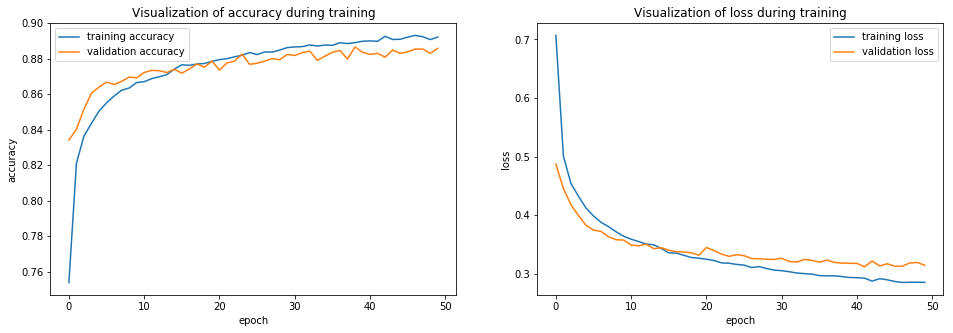

In [13]:
plot_history(history)

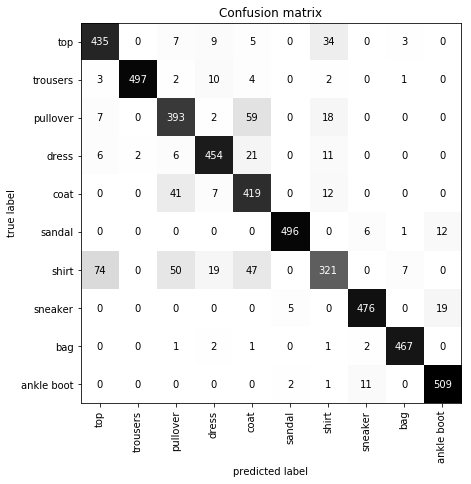

In [14]:
cm = confusion_matrix(test_y, model.predict(test_x).argmax(axis=-1))
plot_confusion_matrix(cm)

In [15]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.34%


In [16]:
HOG_SETTINGS = {
    'orientations': 8,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (1, 1),
    'block_norm': 'L2-Hys',
}

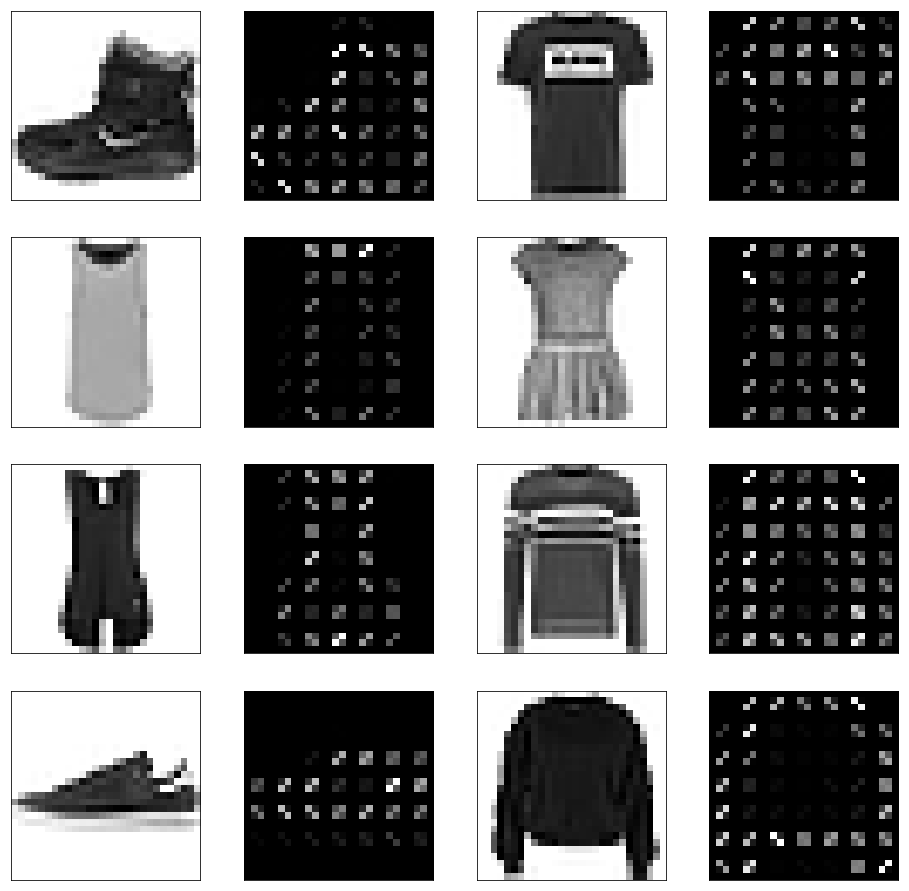

In [17]:
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4, 4, 2 * i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    
    _, hog_image = hog(train_x[i], visualize=True, **HOG_SETTINGS)
    plt.subplot(4, 4, 2 * i + 2)
    plt.imshow(hog_image, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_shape=(392,)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               58950     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 60,460
Trainable params: 60,460
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(
    np.array([hog(im, **HOG_SETTINGS) for im in train_x]),
    train_y,
    validation_data=(np.array([hog(im, **HOG_SETTINGS) for im in val_x]), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 2s - loss: 0.7582 - acc: 0.7332 - val_loss: 0.4698 - val_acc: 0.8290
Epoch 2/50
 - 2s - loss: 0.4895 - acc: 0.8220 - val_loss: 0.4214 - val_acc: 0.8456
Epoch 3/50
 - 2s - loss: 0.4544 - acc: 0.8346 - val_loss: 0.3994 - val_acc: 0.8510
Epoch 4/50
 - 2s - loss: 0.4298 - acc: 0.8433 - val_loss: 0.3816 - val_acc: 0.8594
Epoch 5/50
 - 2s - loss: 0.4116 - acc: 0.8477 - val_loss: 0.3724 - val_acc: 0.8646
Epoch 6/50
 - 2s - loss: 0.4014 - acc: 0.8511 - val_loss: 0.3649 - val_acc: 0.8662
Epoch 7/50
 - 2s - loss: 0.3889 - acc: 0.8562 - val_loss: 0.3562 - val_acc: 0.8700
Epoch 8/50
 - 2s - loss: 0.3817 - acc: 0.8576 - val_loss: 0.3490 - val_acc: 0.8718
Epoch 9/50
 - 2s - loss: 0.3730 - acc: 0.8633 - val_loss: 0.3430 - val_acc: 0.8722
Epoch 10/50
 - 2s - loss: 0.3651 - acc: 0.8658 - val_loss: 0.3406 - val_acc: 0.8726
Epoch 11/50
 - 2s - loss: 0.3584 - acc: 0.8662 - val_loss: 0.3387 - val_acc: 0.8742
Epoch 12/50
 - 2s - loss: 0.3547 - a

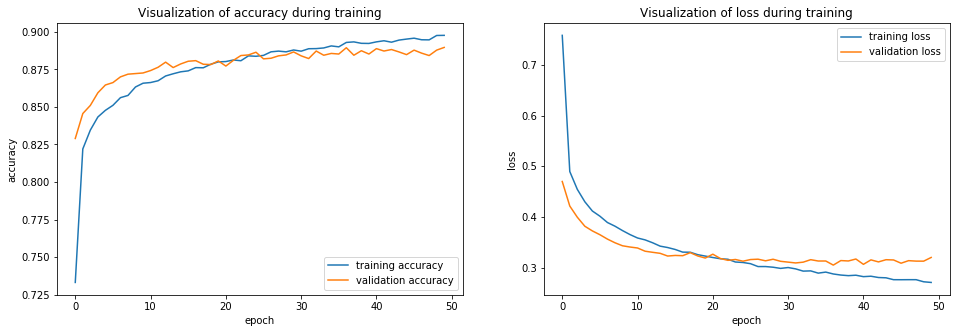

In [20]:
plot_history(history)

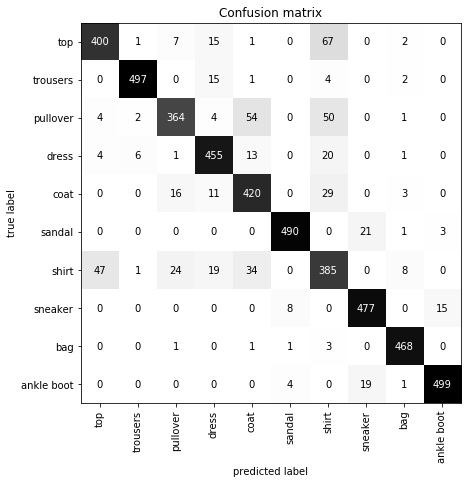

In [21]:
cm = confusion_matrix(
    test_y,
    model.predict(np.array([hog(im, **HOG_SETTINGS) for im in test_x])).argmax(axis=-1))
plot_confusion_matrix(cm)

In [22]:
_, acc = model.evaluate(
    np.array([hog(im, **HOG_SETTINGS) for im in test_x]), test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 89.10%


In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [24]:
history = model.fit(
    train_x.reshape(-1, 28, 28, 1),
    train_y,
    validation_data=(val_x.reshape(-1, 28, 28, 1), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 45s - loss: 0.9027 - acc: 0.6679 - val_loss: 0.5411 - val_acc: 0.7986
Epoch 2/50
 - 47s - loss: 0.5522 - acc: 0.7976 - val_loss: 0.4456 - val_acc: 0.8324
Epoch 3/50
 - 44s - loss: 0.4703 - acc: 0.8304 - val_loss: 0.3895 - val_acc: 0.8606
Epoch 4/50
 - 43s - loss: 0.4208 - acc: 0.8478 - val_loss: 0.3719 - val_acc: 0.8676
Epoch 5/50
 - 45s - loss: 0.3893 - acc: 0.8595 - val_loss: 0.3493 - val_acc: 0.8734
Epoch 6/50
 - 44s - loss: 0.3672 - acc: 0.8680 - val_loss: 0.3300 - val_acc: 0.8782
Epoch 7/50
 - 45s - loss: 0.3511 - acc: 0.8729 - val_loss: 0.3397 - val_acc: 0.8730
Epoch 8/50
 - 46s - loss: 0.3379 - acc: 0.8787 - val_loss: 0.3182 - val_acc: 0.8866
Epoch 9/50
 - 45s - loss: 0.3241 - acc: 0.8828 - val_loss: 0.3216 - val_acc: 0.8840
Epoch 10/50
 - 47s - loss: 0.3148 - acc: 0.8849 - val_loss: 0.3016 - val_acc: 0.8926
Epoch 11/50
 - 47s - loss: 0.3041 - acc: 0.8894 - val_loss: 0.3018 - val_acc: 0.8912
Epoch 12/50
 - 48s - loss

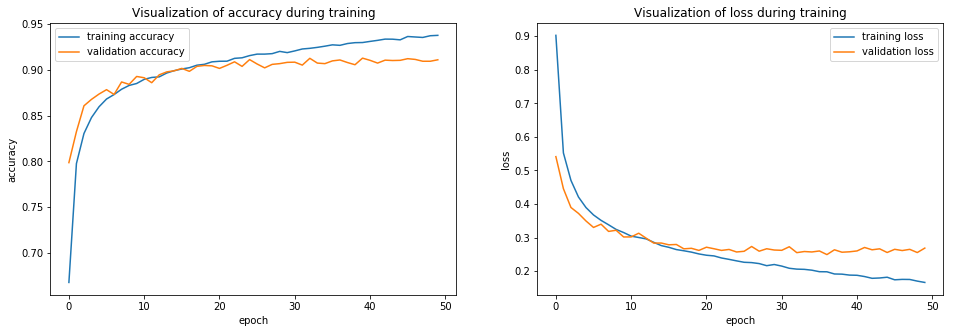

In [25]:
plot_history(history)

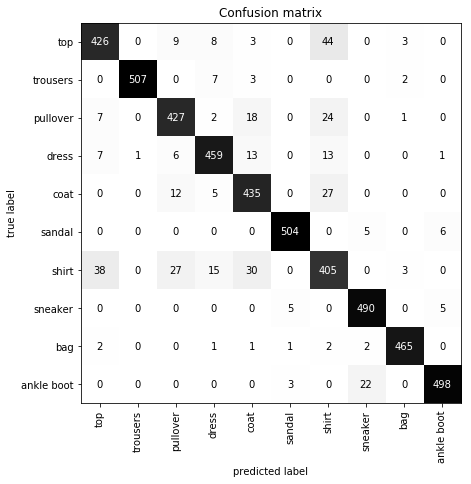

In [26]:
cm = confusion_matrix(test_y, model.predict(test_x.reshape(-1, 28, 28, 1)).argmax(axis=-1))
plot_confusion_matrix(cm)

In [27]:
_, acc = model.evaluate(test_x.reshape(-1, 28, 28, 1), test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 92.32%
